In [2]:
import numpy as np
import pylab as plt
import glob
import h5py
import rficnn as crf

%matplotlib inline

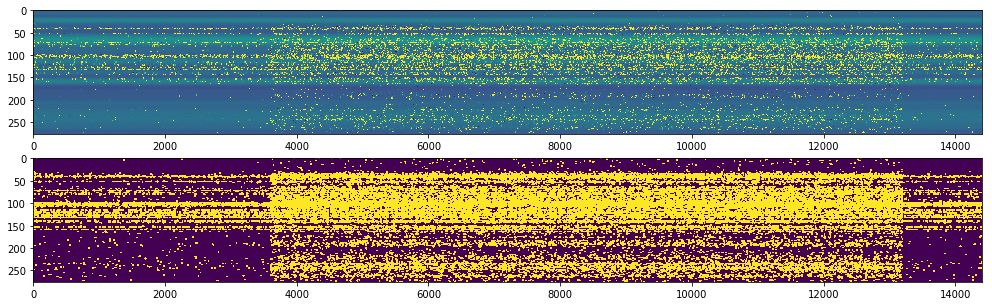

In [4]:
files = glob.glob('/home/anke/HIDE_simulations/hide_sims_train/calib_1year/*.fits')
#sim_files = files[:100]
sim_files = files[:20]

dp = crf.DataProvider(files=sim_files,label_name='RFI_MASK',a_min=0, a_max=200)
x,y = dp(1)
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(17,5))
ax1.imshow(x[0,:,:,0],aspect='auto')
ax2.imshow(y[0,:,:,0],aspect='auto')

In [5]:
nx,ny = 200,200
dp = crf.DataProvider(files=sim_files,label_name='RFI_MASK',
                      nx=nx,ny=ny,a_min=0, a_max=200)

In [16]:
conv = crf.ConvolutionalLayers(nx=nx,ny=ny,n_channel=1,restore=0,
                        model_add='./model',arch_file_name='arch')

NameError: name 'arch' is not defined

In [8]:
conv.train(data_provider=dp,training_epochs = 5,n_s = 10,
           learning_rate = 0.001, dropout=0.7, time_limit=None, verbose=1)

Epoch:0, cost= 96742.668750
Epoch:1, cost= 68469.279297
Epoch:2, cost= 66867.952734
Epoch:3, cost= 61717.834766
Epoch:4, cost= 67852.971484


In [10]:
test_files = files[20:40]
dp = crf.DataProvider(files=test_files,ny=2000,label_name='RFI_MASK',a_min=0, a_max=200)
x,y = dp(1)
pred = conv.conv_large_image(x,pad=10,lx=nx,ly=ny)

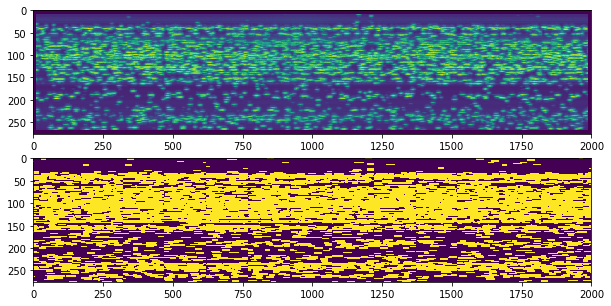

In [15]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,5))
ax1.imshow(pred,aspect='auto')
ax2.imshow(y[0,:,:,0],aspect='auto')